# Task 1 

## Table of Contents
1. [Steps](#steps)
2. [Grover’s Search algorithm](#grover)
3. [Bonus](#bonus)


<a name="steps"></a>
1. [an array of integers as input](#s1)
```
        v = [1,5,7,10]
```
2. [pass them to a binary representation ](#s2)
```
        1 ==> 0001  //|00>
        5 ==> 0101  //|01>
        7 ==> 0111  //|10>
        10 ==> 1010 //|11>
```
3. [find the integers with binary representation such that two adjacent bits are different  ](#s3)
```
        5 ==> 0101
        10 ==> 1010
```
4. [output a superposition of states where each state is a binary representation of the indices of those integers](#s4)
```
        1/sqrt(2) * (|01> + |11>)
```

In [1]:
import numpy as np
import random

# Importing standard Qiskit libraries
from qiskit import *
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

1. vector = [1,5,7,10] <a name="s1"></a>


In [2]:
vec = [1,5,7,10]
n = int(len(vec)/2) #Size of the vector 2^n

In [3]:
# maxbitLength m
def MaxbitLength(vector) : 
    maxbitLength=(max(vector)).bit_length()
    print("max bit-length :",maxbitLength)
    return maxbitLength
maxbitLength = MaxbitLength(vec)

max bit-length : 4


2. binary representation <a name="s2"></a>

In [4]:
# convert int to bit string
def Binary(vector):
    '''
    a function that gives the binary reperesentation
    
    Parameters:
        vector (list) : input of number list 
    Returns:
        Bin (list) : binary reperesentation of each number with a length of "maxbitLength"
    '''
    Bin = []
    for i in range(len(vector)):
        Bin.append(np.binary_repr(vector[i], width=maxbitLength))
        print(vec[i],"index",i,"==>",Bin[i])
    return Bin

Bin = Binary(vec)

1 index 0 ==> 0001
5 index 1 ==> 0101
7 index 2 ==> 0111
10 index 3 ==> 1010


method2 : binary with qiskit( decimal_to_binary() )

In [5]:
from qiskit.aqua.utils import decimal_to_binary

v = [1,5,7,10]
b = []

for i in range(len(vec)):
    b.append(decimal_to_binary(vec[i], max_num_digits=0, fractional_part_only=False))
print("list of bits",b)

list of bits ['1.', '101.', '111.', '1010.']


/opt/conda/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


3. find the integers with binary representation such that two adjacent bits are different <a name="s3"></a>

In [6]:
def alternatingBitset(vector):
    '''
    a function that gives the binary reperesentation
    
    Parameters:
        vector (list) : input of number list 
    Returns:
        Alternating_bits (list) : a list of alternating set bit 
    '''
    Alternating_bits =[]
    
    for i in range(len(vector)):
        alternating_bit= vector[i]^(vector[i]>>1)  #will produce a number with set bits only ex :1111.
        bit_set = (alternating_bit + 1) & alternating_bit #  == 0, if all bits are set
        if bit_set == 0 and vector[i]>1:
            num = np.binary_repr(vector[i], width=maxbitLength)
            Alternating_bits.append(num)
            print(vector[i],"has alternating set bit")
            
    if type(Alternating_bits) =="NoneType":
        return print("None")
    return Alternating_bits

Alternating_bits = alternatingBitset(vec)

5 has alternating set bit
10 has alternating set bit


```
alternating set  bit :

n= 10
n>>1 #bit shift ==> 101
n^(n>>1) # ==> 111
(n^n>>1) +1) & (n^(n>>1) ==> 0 for alternating bit

or
(10 >> 1)& 10 # 101 & 1010 ==> 0
```

indices of the binary alternating set bit

In [7]:
def index(alternating) :
    '''
    a function that outputs the index of the binary alternating set bit 
    number representation in the original vector
    
    Parameters:
        alternating (list) : a list of alternating set bit  
    Returns:
        indices (list) : index index of alternating set bit in 
                         the vector
    '''
    indices = []
    for i in range(len(alternating)):
        x = Bin.index(alternating[i])
        indices.append(x)
    print("alternating set bit index ",indices)
    return indices
indices = index(Alternating_bits)

alternating set bit index  [1, 3]


4. output a superposition of states where each state is a binary representation of the indices of those integers <a name="s4"></a>

In [8]:
#Define initial_state with the target solution in superposition
initial_state = np.zeros( shape = (2**n) )

for i in range(len(vec)):
    for j in range(len(indices)):
        if i == int(indices[j]):
            initial_state[i] = 1/np.sqrt(2)
            
print(initial_state)

[0.         0.70710678 0.         0.70710678]


[0.        +0.j 0.70710678+0.j 0.        +0.j 0.70710678+0.j]


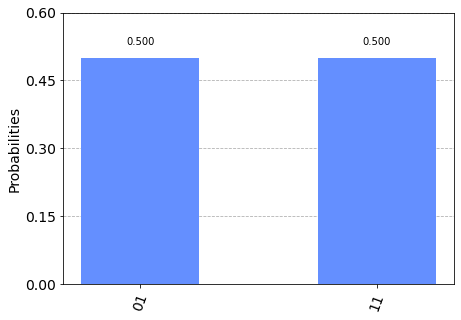

In [9]:
sim = Aer.get_backend('aer_simulator')

# Quantum Circuit
num_qubits = n
qc = QuantumCircuit(num_qubits) 
qc.initialize(initial_state, qc.qubits) 
qc.save_statevector() 

#run on local simulator

job = sim.run(qc)
state = job.result().get_statevector() 

print(state) 

#result
result = job.result().get_counts()
plot_histogram(result)

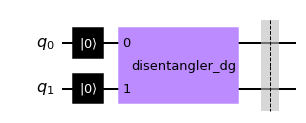

In [10]:
qc.decompose().draw()

In [ ]:
"""
from qiskit import IBMQ
IBMQ.load_account()

device = provider.get_backend('ibmq_qasm_simulator')
qobj = assemble(qc)
result = device.run(qobj).result().get_counts()
plot_histogram(result)
"""

# -------------------------------------------------------------------


### [Grover’s Search algorithm ](https://qiskit.org/documentation/stubs/qiskit.aqua.algorithms.Grover.html?highlight=grover#qiskit.aqua.algorithms.Grover) <a name="grover"></a>

1. specify the oracle of Grover Search with Statevector from Indices of the solution

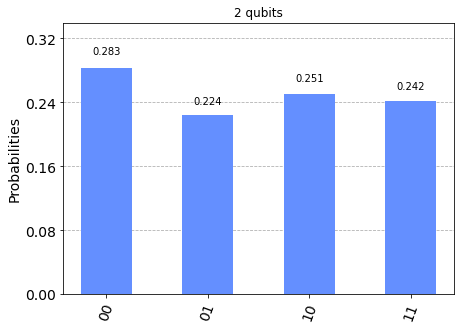

In [12]:
from qiskit.quantum_info import Statevector
from qiskit.aqua.algorithms import Grover
from qiskit.utils import QuantumInstance

oracle = Statevector.from_int(indices,dims=2**n)
good_state = indices

grover = Grover(oracle=oracle, good_state=good_state)

backend = BasicAer.get_backend('qasm_simulator')
result = grover.run(quantum_instance=backend)

plot_histogram(result.measurement, title="2 qubits")

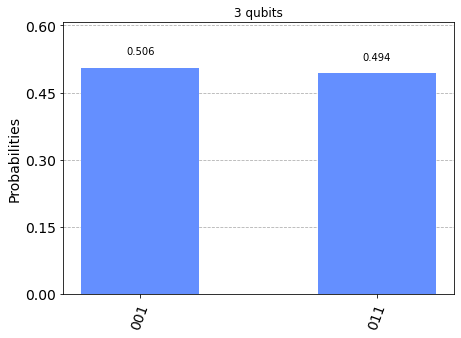

In [13]:
# with 3 qubits ex: 01 shifted to 001
oracle = Statevector.from_int(indices,dims=2**(n+1))
good_state = indices

grover = Grover(oracle=oracle, good_state=good_state)
result = grover.run(quantum_instance=backend)

plot_histogram(result.measurement, title="3 qubits")

2. Grover search with 01 and 11 marked solutions of the vector [1,5,7,10]

In [14]:
vec = [1,5,7,10]

num_qubits = 2 #2 qubits
grover_circuit = QuantumCircuit(num_qubits )

def initialize(qc, num_qubits):
    'Apply a H-gate'
    for q in range(num_qubits):
        qc.h(q)
    return qc

grover_circuit = initialize(grover_circuit, num_qubits)

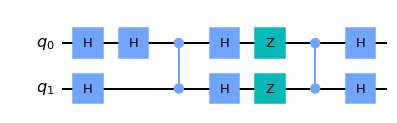

In [15]:
# 01 and 11 marked solution
grover_circuit.h(0)
grover_circuit.cz(0, 1)

grover_circuit.h(0)
grover_circuit.h(1)
grover_circuit.z(1)
grover_circuit.z(0)
grover_circuit.cz(0, 1)

grover_circuit.h(0)
grover_circuit.h(1)

grover_circuit.draw()

In [16]:
sim = Aer.get_backend('aer_simulator')

# state vector
grover_circuit_sim = grover_circuit.copy()
grover_circuit_sim.save_statevector()
qobj = assemble(grover_circuit_sim)
result = sim.run(qobj).result()
statevec = result.get_statevector()

from qiskit_textbook.tools import vector2latex
vector2latex(statevec, pretext="|\\psi\\rangle =")

/opt/conda/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


<IPython.core.display.Math object>

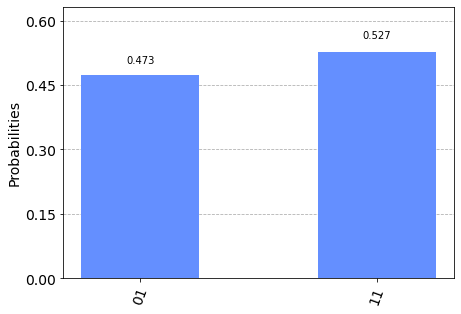

In [17]:
grover_circuit.measure_all()

qobj = assemble(grover_circuit)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

Test : display with top measurment the altenating bit set of 5 and 10

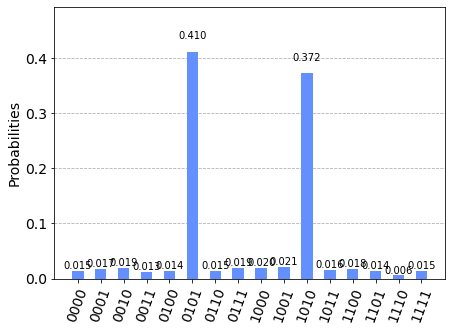

In [18]:
oracle = Statevector.from_int([5,10],dims=2**4)
good_state = [1]

grover = Grover(oracle=oracle, good_state=good_state)

backend = BasicAer.get_backend('qasm_simulator')
result = grover.run(quantum_instance=backend)

plot_histogram(result.measurement)

### BONUS : create a random vector <a name="bonus"></a>

In [19]:
n = 2

def createVector(n, start, stop):
    '''
    a function that creates a vector with unique numbers
    
    Parameters:
        n(integer) : Size of the vector 2^n
        start,stop (integer) :  start <= number <= stop
    Returns:
        vector (list)
    '''
    vector = []
    num = random.randint(start, stop)
    for i in range(2**n) :
        # checks for unique numbers
        while num in vector :
            num = random.randint(start, stop)
        vector.append(num)
        
    return vector

vec = createVector(n, 3, 15)
print(vec)
maxbitLength = MaxbitLength(vec)
Bin = Binary(vec)
Alternating_bits = alternatingBitset(vec)
indices = index(Alternating_bits)

[9, 6, 8, 11]
max bit-length : 4
9 index 0 ==> 1001
6 index 1 ==> 0110
8 index 2 ==> 1000
11 index 3 ==> 1011
alternating set bit index  []


In [20]:
def circuit (n,vector, indices):
    initial_state = np.zeros( shape = (2**n) )

    for i in range(len(vector)):
        for j in range(len(indices)):
            if i == int(indices[j]):
                initial_state[i] = 1/np.sqrt(2)
            
    print("initial_state",initial_state)
    
    sim = Aer.get_backend('aer_simulator')

# Quantum Circuit
    num_qubits = n
    qc = QuantumCircuit(num_qubits) 
    qc.initialize(initial_state, qc.qubits) 
    qc.save_statevector() 

#run on local simulator
    qobj = assemble(qc)
    job = sim.run(qobj)
    state = job.result().get_statevector() 
    
    print("final state",state) 

#result
    result = job.result().get_counts()
    return result

In [22]:
if len(Alternating_bits)==2 :
    circuit (n,vec, indices)
else : 
    print("Check another vector with 2 integers alternating bits")
    
    # input new vector
    n = int(input("Size of the vector 2^"))
    vec = []
    for i in range(0, 2**n):
        num = int(input())
        vec.append(num)
    print(vec)
    maxbitLength = MaxbitLength(vec)
    Bin = Binary(vec)
    Alternating_bits = alternatingBitset(vec)
    indices = index(Alternating_bits)
    circuit (n,vec, indices)

Check another vector with 2 integers alternating bits


Size of the vector 2^ 2
 1
 5
 4
 2


[1, 5, 4, 2]
max bit-length : 3
1 index 0 ==> 001
5 index 1 ==> 101
4 index 2 ==> 100
2 index 3 ==> 010
5 has alternating set bit
2 has alternating set bit
alternating set bit index  [1, 3]
initial_state [0.         0.70710678 0.         0.70710678]
final state [0.        +0.j 0.70710678+0.j 0.        +0.j 0.70710678+0.j]
